## Overview of Business Problem

Consider a bank who wants to launch its insurance product to target the customers with high probability. They are unaware of which customer would opt for this product.

In this case the bank will retrieve the data of the customer from their previous interactions and leverage machine learning
algorithms like Logistic regression to predict which customer will be interested in the insurance and which will not.

Agenda :

1.Importing the dataset

2.Missing value Analysis

3.Feature selection  feature -->independent variables    target-->dependent variable
      
      1.Chi-Square test
       
      2.IV-Score Analysis
      
      3.VIF 

4.Model fitting

# Importing the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\hp\Downloads\bank-additional-full.csv", sep=';')

In [3]:
data.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45.0,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59.0,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41.0,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24.0,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25.0,services,single,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41199, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [6]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1726
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [7]:
data['contact'].unique()

array(['telephone', 'cellular', nan], dtype=object)

In [8]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [10]:
c=data['marital'].value_counts().tolist()
c

[24934, 11568, 4612, 80]

In [11]:
col=list(data.columns)
col

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [12]:
data.isnull().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

# Boxplot

Using boxplot we will be visualizing the outliers,after that we will be using IQR method and handling the outliers.

with the help of boxplot we can visualize that 'age','duration','campaign','cons.conf.idx' columns has a outlier.

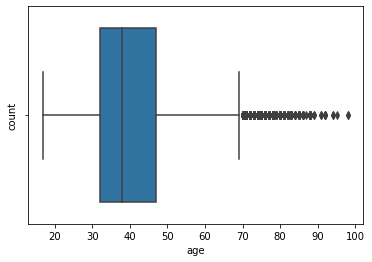

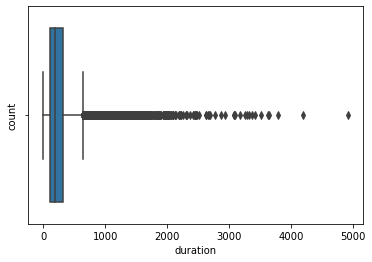

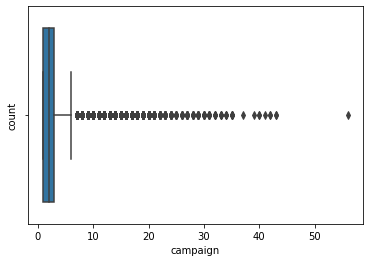

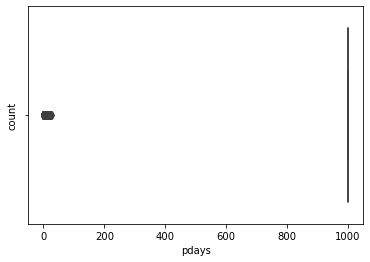

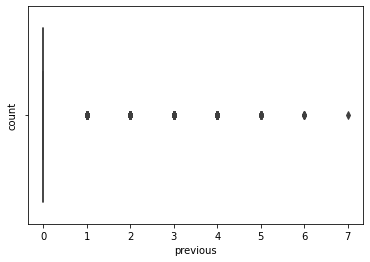

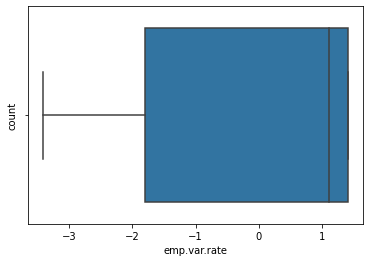

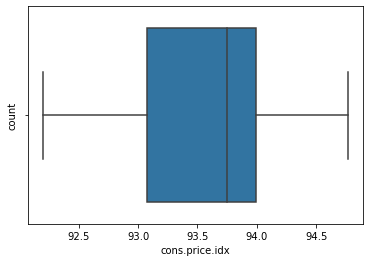

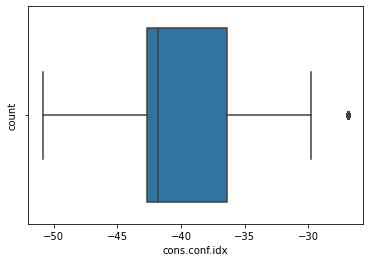

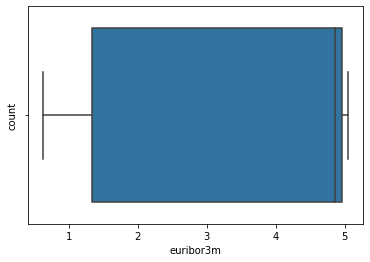

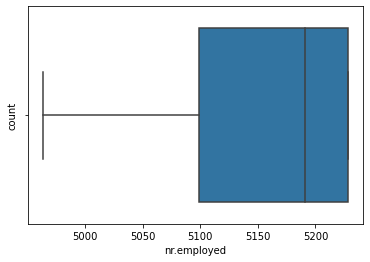

In [13]:
for col_name in col:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [14]:
#handling outliers

col_names=['age','duration','campaign','cons.conf.idx']
Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.age >= Q1 - 1.5*IQR) & (data.age <= Q3 + 1.5*IQR)]


Q1 = data.duration.quantile(0.25)
Q3 = data.duration.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.duration >= Q1 - 1.5*IQR) & (data.duration <= Q3 + 1.5*IQR)]

Q1 = data.campaign.quantile(0.25)
Q3 = data.campaign.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.campaign >= Q1 - 1.5*IQR) & (data.campaign <= Q3 + 1.5*IQR)]

Q1 = data['cons.conf.idx'].quantile(0.25)
Q3 = data['cons.conf.idx'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['cons.conf.idx'] >= Q1 - 1.5*IQR) & (data['cons.conf.idx'] <= Q3 + 1.5*IQR)]

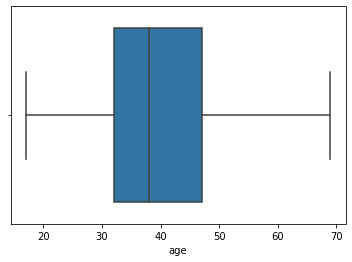

In [15]:
 sns.boxplot(data['age'])
 plt.show()   

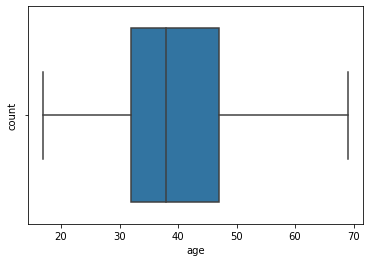

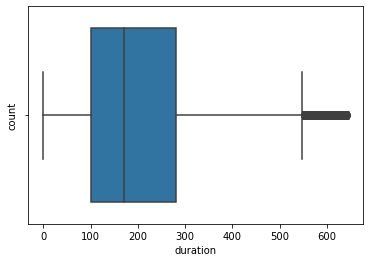

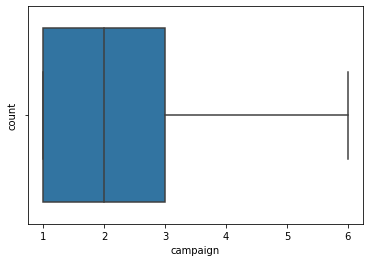

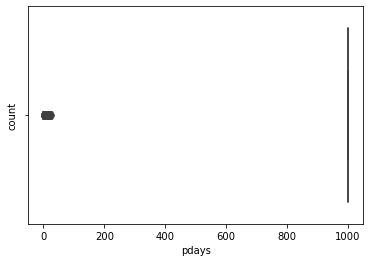

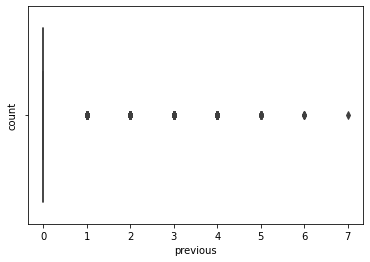

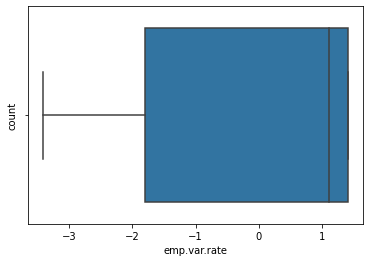

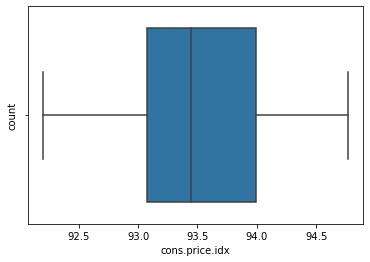

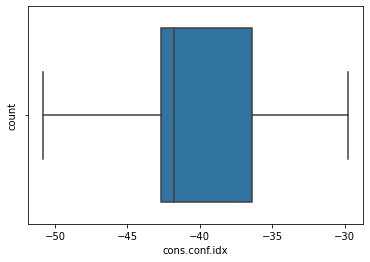

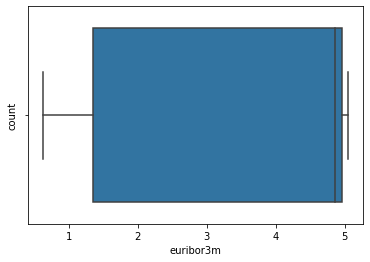

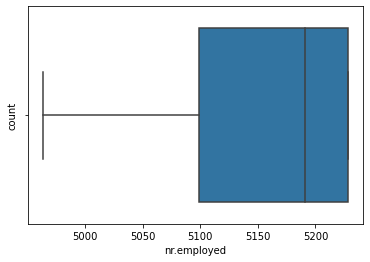

In [16]:
for col_name in col:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

So we are done with Handling outliers so once again we'll plot the box plot and check the difference before and after.

From the above box plot we can visualize that all the outliers have been removed .

# Missing Value Analysis


Checking for missing values and replacing the respective numerical and categorical values with mean/median and mode

In [17]:
#Checking for missing values and replacing the respective numerical and categorical values with mean/median and mode

data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [18]:
data['y']

0         no
1         no
2         no
3         no
4         no
        ... 
41181    yes
41182     no
41184     no
41185     no
41186    yes
Name: y, Length: 35176, dtype: object

In [19]:

data['y'] = np.where(data['y'] == 'yes',1,0)
data['y'].dtype

dtype('int32')

In [20]:
data['y'] = data['y'].astype(str)

In [21]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [22]:
#taking all columns in single list
col_list = list(data.columns)

In [23]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [24]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [25]:

for col in col_list:
    if data[col].dtypes=='object':
        #print('ob')
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        #print('num')
        data[col] = data[col].fillna(data[col].mean())

In [26]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29.0,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


After replacing with mean/median and mode ,we can check for the null values again and check the result

In [27]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Feature Selection

Why feature selection methods on the data?


because once you select a relevant features(independent attributes) ,then your model become more interpretable and model training speeds up and you'll end up with a efficient model.

In [28]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [29]:
data['age'] = data.age.astype(int)

In [30]:
# Binning
bins = [0,50,100]
data['age'] = pd.cut(data['age'], bins)

data['age'] = data.age.astype(str)

In [31]:
pd.cut?

In [32]:
data['age'].value_counts()/len(data['age'])

(0, 50]      0.836081
(50, 100]    0.163919
Name: age, dtype: float64

In [33]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 100]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(50, 100]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(0, 50]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"(0, 50]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"(50, 100]",services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,"(0, 50]",admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41182,"(0, 50]",unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,0
41184,"(0, 50]",blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,"(50, 100]",retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0


In [34]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [35]:
data.age.value_counts()

(0, 50]      29410
(50, 100]     5766
Name: age, dtype: int64

In [36]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 100]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(50, 100]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(0, 50]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"(0, 50]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"(50, 100]",services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,"(0, 50]",admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41182,"(0, 50]",unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,0
41184,"(0, 50]",blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,"(50, 100]",retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0


# one hot encoding

In [37]:
#one hot encoding
col_list = []
for col in data.columns:
    if ((data[col].dtype == 'object') & (col != 'y') ):
        col_list.append(col)

df_2 = pd.get_dummies(data[col_list],drop_first=True)

for col in df_2.columns:
    df_2[col] =  df_2[col].astype(int)
df_2.shape

(35176, 44)

In [38]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 100]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(50, 100]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(0, 50]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"(0, 50]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"(50, 100]",services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,"(0, 50]",admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41182,"(0, 50]",unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,0
41184,"(0, 50]",blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,"(50, 100]",retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0


In [39]:
df_2

,"age_(50, 100]",job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41182,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
41184,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41185,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [40]:
df_2.columns

Index(['age_(50, 100]', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [41]:
df_combined = pd.concat([data, df_2], axis=1)
df_combined.shape                                                                                  

(35176, 65)

In [42]:
df_combined.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,"(50, 100]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
1,"(50, 100]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
2,"(0, 50]",services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
3,"(0, 50]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
4,"(50, 100]",services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0


In [43]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [44]:
##Drop fields for which dummy vars already created
df_combined.drop(columns = col_list,axis = 1,inplace = True)

In [45]:
df_combined.dtypes

duration                         float64
campaign                         float64
pdays                            float64
previous                         float64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                 object
age_(50, 100]                      int32
job_blue-collar                    int32
job_entrepreneur                   int32
job_housemaid                      int32
job_management                     int32
job_retired                        int32
job_self-employed                  int32
job_services                       int32
job_student                        int32
job_technician                     int32
job_unemployed                     int32
job_unknown                        int32
marital_married                    int32
marital_single                     int32
marital_unknown 

In [46]:
df_combined.head()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
1,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
2,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
3,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
4,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0


# Label Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in col_list:
    data[i]=labelencoder.fit_transform(data[i])

In [48]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,1,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,1,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0


## What is Multicollinearity Analysis ?

This is the process of occurrence of multiple intercorrelation among one or more independent variables

As collinearity analysis cannot find the hidden correlations, we use multicollinearity analysis.

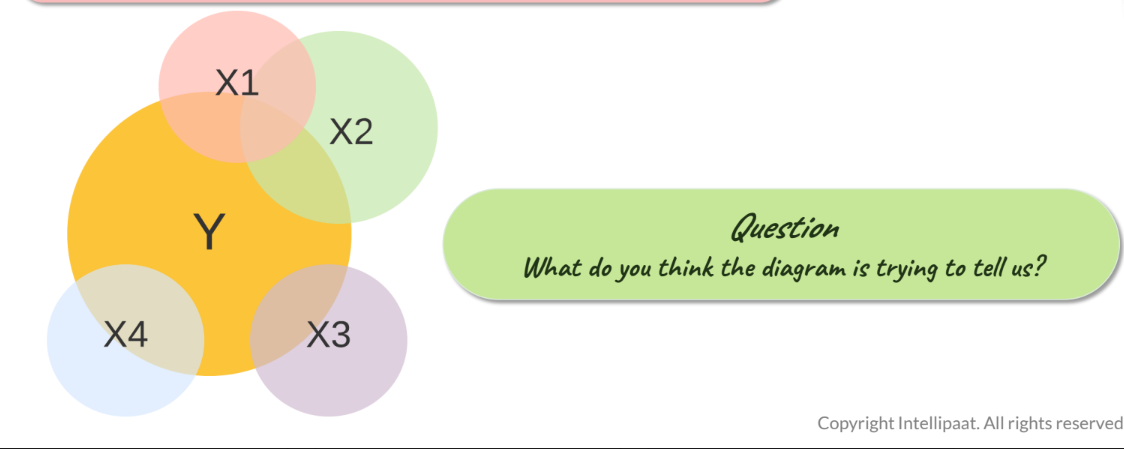

-> So, in the diagram we can see that Y has a correlation with X1, X2, X3 and X4.

-> We can also see that X1 and X2 also have a high correlation.

-> Think of overlap between these bubbles as correlation in variables.

-> This process helps to avoid overlap between these independent variables.

## Why Collinearity Analysis

-> Simply putting we first eliminate the highest correlated variable and then eliminate the next highest correlated variable.

-> The variables with high correlation can be removed by using VIF.

## VIF

A variance inflation factor (VIF) is  a measure of multicollinearity among the independent variables in a multiple regression model.


Finding  multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables. 


A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.


So we'll consider the VIF values <=5 ,rest all we'll remove the featuers with value >5.


In [49]:


from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
vif_data
#dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})

,feature,VIF
0,age,1.286091
1,job,2.102585
2,marital,5.102803
3,education,4.554388
4,default,1.388194
5,housing,2.212322
6,loan,1.208221
7,contact,2.944622
8,month,6.682403
9,day_of_week,3.098168


In [50]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
1,1,7,1,3,1,0,0,1,6,1,149.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
2,0,7,1,3,0,2,0,1,6,1,226.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
3,0,0,1,1,0,0,0,1,6,1,151.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
4,1,7,1,3,0,0,2,1,6,1,307.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0,0,1,6,0,2,0,0,7,0,281.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41182,0,10,2,0,0,2,0,0,7,0,112.0,1.0,9.0,1.0,2,-1.1,94.767,-50.8,1.028,4963.6
41184,0,1,1,5,0,0,0,0,7,0,383.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,1,5,1,6,0,2,0,0,7,0,189.0,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6


In [51]:
X.values


array([[ 1.0000e+00,  3.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       [ 1.0000e+00,  7.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       [ 0.0000e+00,  7.0000e+00,  1.0000e+00, ..., -3.6400e+01,
         4.8570e+00,  5.1910e+03],
       ...,
       [ 0.0000e+00,  1.0000e+00,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03],
       [ 1.0000e+00,  5.0000e+00,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03],
       [ 0.0000e+00,  9.0000e+00,  1.0000e+00, ..., -5.0800e+01,
         1.0280e+00,  4.9636e+03]])

In [52]:


from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
vif_data


,feature,VIF
0,age,1.286091
1,job,2.102585
2,marital,5.102803
3,education,4.554388
4,default,1.388194
5,housing,2.212322
6,loan,1.208221
7,contact,2.944622
8,month,6.682403
9,day_of_week,3.098168


In [53]:
data=data.drop(['nr.employed'], axis = 1)

In [54]:


from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
vif_data

,feature,VIF
0,age,1.283994
1,job,2.102382
2,marital,5.101849
3,education,4.552683
4,default,1.385439
5,housing,2.211991
6,loan,1.208174
7,contact,2.445903
8,month,5.778944
9,day_of_week,3.097315


In [55]:
data=data.drop(['cons.price.idx'], axis = 1)

In [56]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
vif_data

,feature,VIF
0,age,1.278021
1,job,2.096917
2,marital,5.056276
3,education,4.504006
4,default,1.383653
5,housing,2.210197
6,loan,1.207618
7,contact,2.348331
8,month,5.708546
9,day_of_week,3.084754


In [57]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
vif_data

,feature,VIF
0,age,1.278021
1,job,2.096917
2,marital,5.056276
3,education,4.504006
4,default,1.383653
5,housing,2.210197
6,loan,1.207618
7,contact,2.348331
8,month,5.708546
9,day_of_week,3.084754


In [58]:
data=data.drop(['pdays'], axis = 1)

In [59]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

          feature        VIF
0             age   1.274717
1             job   2.093453
2         marital   5.014482
3       education   4.452427
4         default   1.381688
5         housing   2.206039
6            loan   1.207467
7         contact   2.268827
8           month   5.630301
9     day_of_week   3.073139
10       duration   3.180171
11       campaign   3.561702
12       previous   1.475885
13       poutcome   8.042343
14   emp.var.rate  11.603674
15  cons.conf.idx  39.123262
16      euribor3m  55.239728


In [60]:
data=data.drop(['euribor3m'], axis = 1)

In [61]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

          feature        VIF
0             age   1.259460
1             job   2.085184
2         marital   4.971766
3       education   4.269465
4         default   1.379175
5         housing   2.194997
6            loan   1.207136
7         contact   2.251905
8           month   5.269694
9     day_of_week   3.026761
10       duration   3.166102
11       campaign   3.549529
12       previous   1.468767
13       poutcome   7.783232
14   emp.var.rate   1.537937
15  cons.conf.idx  20.817750


In [62]:
data=data.drop(['cons.conf.idx'], axis = 1)

In [63]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

         feature       VIF
0            age  1.247822
1            job  2.058985
2        marital  4.488969
3      education  4.016190
4        default  1.344649
5        housing  2.115051
6           loan  1.200961
7        contact  2.241299
8          month  4.607984
9    day_of_week  2.890443
10      duration  2.996524
11      campaign  3.204858
12      previous  1.447449
13      poutcome  6.640213
14  emp.var.rate  1.531582


In [64]:
data=data.drop(['poutcome'], axis = 1)

In [65]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

         feature       VIF
0            age  1.229031
1            job  2.042486
2        marital  4.231967
3      education  3.800728
4        default  1.338359
5        housing  2.085805
6           loan  1.199105
7        contact  2.225352
8          month  4.497906
9    day_of_week  2.809804
10      duration  2.852948
11      campaign  3.090579
12      previous  1.372983
13  emp.var.rate  1.522923


In [66]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,y
0,1,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,1.1,0
1,1,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,1.1,0
2,0,7,1,3,0,2,0,1,6,1,226.0,1.0,0.0,1.1,0
3,0,0,1,1,0,0,0,1,6,1,151.0,1.0,0.0,1.1,0
4,1,7,1,3,0,0,2,1,6,1,307.0,1.0,0.0,1.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0,0,1,6,0,2,0,0,7,0,281.0,1.0,0.0,-1.1,1
41182,0,10,2,0,0,2,0,0,7,0,112.0,1.0,1.0,-1.1,0
41184,0,1,1,5,0,0,0,0,7,0,383.0,1.0,0.0,-1.1,0
41185,1,5,1,6,0,2,0,0,7,0,189.0,2.0,0.0,-1.1,0


# Model building

In [67]:
Ind_Features = list(data.columns)
Ind_Features.remove('y')
x = data[Ind_Features]
y = data['y']

In [68]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,y
0,1,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,1.1,0
1,1,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,1.1,0
2,0,7,1,3,0,2,0,1,6,1,226.0,1.0,0.0,1.1,0
3,0,0,1,1,0,0,0,1,6,1,151.0,1.0,0.0,1.1,0
4,1,7,1,3,0,0,2,1,6,1,307.0,1.0,0.0,1.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0,0,1,6,0,2,0,0,7,0,281.0,1.0,0.0,-1.1,1
41182,0,10,2,0,0,2,0,0,7,0,112.0,1.0,1.0,-1.1,0
41184,0,1,1,5,0,0,0,0,7,0,383.0,1.0,0.0,-1.1,0
41185,1,5,1,6,0,2,0,0,7,0,189.0,2.0,0.0,-1.1,0


In [69]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41181    1
41182    0
41184    0
41185    0
41186    1
Name: y, Length: 35176, dtype: object

In [70]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
0,1,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,1.1
1,1,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,1.1
2,0,7,1,3,0,2,0,1,6,1,226.0,1.0,0.0,1.1
3,0,0,1,1,0,0,0,1,6,1,151.0,1.0,0.0,1.1
4,1,7,1,3,0,0,2,1,6,1,307.0,1.0,0.0,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0,0,1,6,0,2,0,0,7,0,281.0,1.0,0.0,-1.1
41182,0,10,2,0,0,2,0,0,7,0,112.0,1.0,1.0,-1.1
41184,0,1,1,5,0,0,0,0,7,0,383.0,1.0,0.0,-1.1
41185,1,5,1,6,0,2,0,0,7,0,189.0,2.0,0.0,-1.1


In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [72]:
pd.DataFrame(x_train)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
10327,0,8,2,3,0,2,2,1,4,1,100.0,1.0,0.0,1.4
8470,0,0,1,3,1,0,0,1,4,3,490.0,6.0,0.0,1.4
9035,0,4,1,3,1,0,2,1,4,2,70.0,2.0,0.0,1.4
31940,0,7,2,3,0,0,0,0,6,2,132.0,2.0,0.0,-1.8
28950,0,0,0,3,0,0,0,0,0,0,156.0,1.0,1.0,-1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24340,1,6,1,2,0,2,0,0,7,1,62.0,1.0,0.0,-0.1
37053,0,8,2,3,0,0,0,0,3,4,625.0,1.0,1.0,-2.9
35141,0,6,0,6,0,2,0,0,6,0,116.0,1.0,0.0,-1.8
24860,0,0,1,6,1,2,0,0,7,3,88.0,1.0,0.0,-0.1


In [73]:
pd.DataFrame(x_test)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
3871,0,1,1,0,0,0,0,1,6,0,230.0,2.0,0.0,1.1
32207,0,9,1,5,0,2,0,0,6,0,346.0,1.0,1.0,-1.8
2318,0,9,2,6,1,0,0,1,6,3,106.0,1.0,0.0,1.1
13440,1,4,1,6,0,2,0,0,3,4,281.0,3.0,0.0,1.4
39109,1,5,1,5,0,0,0,0,2,1,137.0,1.0,1.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32735,0,7,2,3,0,0,0,0,6,1,75.0,1.0,1.0,-1.8
4150,0,0,2,3,0,0,2,1,6,1,8.0,2.0,0.0,1.1
18709,0,0,1,1,0,2,0,0,3,2,135.0,3.0,0.0,1.4
33710,0,1,1,0,0,2,0,0,6,4,172.0,1.0,0.0,-1.8


In [74]:
y_train

10327    0
8470     0
9035     0
31940    0
28950    0
        ..
24340    0
37053    0
35141    0
24860    0
2978     0
Name: y, Length: 26382, dtype: object

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
logisticRegr = LogisticRegression()

In [77]:
#####Model Fitting/Training###
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [78]:
test_pred = logisticRegr.predict(x_test)

In [79]:
test_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [80]:
pred = pd.DataFrame() 
pred["y_test"] = y_test
pred["y_pred"] = test_pred
pred

,y_test,y_pred
3871,0,0
32207,0,0
2318,0,0
13440,0,0
39109,0,0
...,...,...
32735,0,0
4150,0,0
18709,0,0
33710,0,0


In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,test_pred)

0.9265408232886059

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
c1=confusion_matrix(y_test,test_pred)

In [84]:
c1

array([[7995,  149],
       [ 497,  153]], dtype=int64)